In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [313]:
tabla_1 = pd.read_csv("BARD_1976-1993_KPVT_tilts.csv")
tabla_2 = pd.read_csv('BARD_1992-1999_SPMG_tilts.csv')
tabla_3 = pd.read_csv('BARD_1996-2010_MDI_tilts.csv')
tabla_4 = pd.read_csv('BARD_2010-2016_HMI_tilts.csv')

In [314]:
tiempo_1 = pd.to_datetime(tabla_1.loc[:,['Year','Month','Day','Hour','Minute','Second']])
tabla_1['Date'] = tiempo_1
indices_1 = tabla_1.set_index(['Date'])

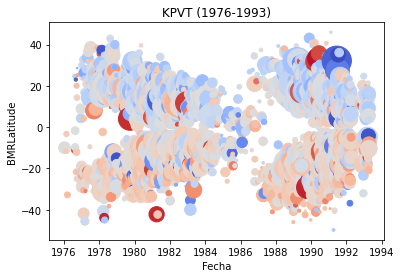

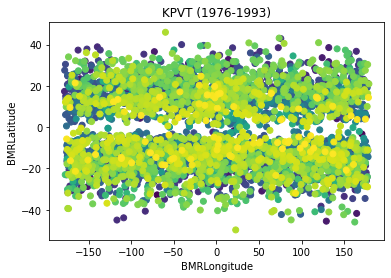

In [315]:
flux = tabla_1['BMRFlux']

# Normalizar flujo

def minmax_norm(df_input):
    return (flux - flux.min()) / (flux.max() - flux.min())

flux_norm = 1000 * minmax_norm(flux)

# plot

plt.scatter(tiempo_1, tabla_1['BMRLatitude'], s=flux_norm, c=tabla_1['Tilt_rel'], cmap='coolwarm')
plt.title('KPVT (1976-1993)')
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')
plt.show()

plt.scatter(tabla_1['BMRLongitude'], tabla_1['BMRLatitude'], c=tiempo_1, cmap='viridis')
plt.title('KPVT (1976-1993)')
plt.xlabel('BMRLongitude')
plt.ylabel('BMRLatitude')
plt.show()

C:\Users\diego\AppData\Local\Temp/ipykernel_18948/2757920263.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = indices_1.loc[inicio : fin]


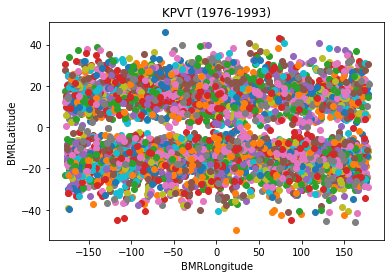

In [316]:
for i in range(1976,1994):
    mascara = tabla_1['Year'] == i
    for j in range(6):
        year = i
        m1 = 2*j + 1
        m2 = 2*j + 2
        inicio = str(year)+'-'+str(m1)
        fin = str(year)+'-'+str(m2)
        data = indices_1.loc[inicio : fin]

        plt.plot()
        plt.scatter(data['BMRLongitude'], data['BMRLatitude'])

plt.title('KPVT (1976-1993)')
plt.xlabel('BMRLongitude')
plt.ylabel('BMRLatitude')
plt.show()

In [317]:
tiempo_2 = pd.to_datetime(tabla_2.iloc[:,[1,2,3,4,5,6]])
tabla_2['Date'] = tiempo_2
indices_2 = tabla_2.set_index(['Date'])

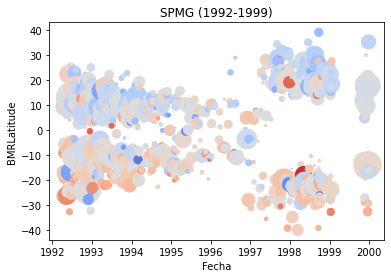

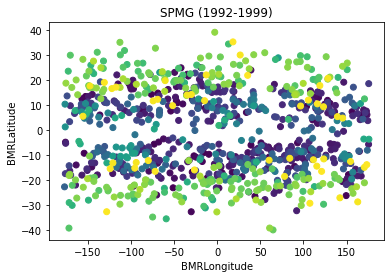

In [318]:
flux = tabla_2['BMRFlux']

# Normalizar flujo

def minmax_norm(df_input):
    return (flux - flux.min()) / (flux.max() - flux.min())

flux_norm = 1000 * minmax_norm(flux)

# plot

plt.scatter(tiempo_2, tabla_2['BMRLatitude'], s=flux_norm, c=tabla_2['Tilt_rel'], cmap='coolwarm')
plt.title('SPMG (1992-1999)')
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')
plt.show()

plt.scatter(tabla_2['BMRLongitude'], tabla_2['BMRLatitude'], c=tiempo_2, cmap='viridis')
plt.title('SPMG (1992-1999)')
plt.xlabel('BMRLongitude')
plt.ylabel('BMRLatitude')
plt.show()

C:\Users\diego\AppData\Local\Temp/ipykernel_18948/739524836.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = indices_2.loc[inicio : fin]


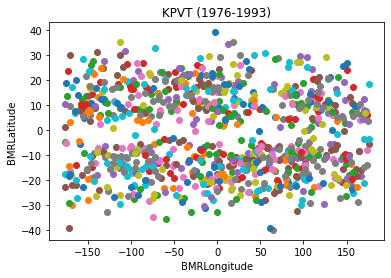

In [319]:
for i in range(1992,2000):
    mascara = tabla_1['Year'] == i
    for j in range(6):
        year = i
        m1 = 2*j + 1
        m2 = 2*j + 2
        inicio = str(year)+'-'+str(m1)
        fin = str(year)+'-'+str(m2)
        data = indices_2.loc[inicio : fin]

        plt.plot()
        plt.scatter(data['BMRLongitude'], data['BMRLatitude'])

plt.title('KPVT (1976-1993)')
plt.xlabel('BMRLongitude')
plt.ylabel('BMRLatitude')
plt.show()

In [320]:
tiempo_3 = pd.to_datetime(tabla_3.iloc[:,[1,2,3,4,5,6]])
tabla_3['Date'] = tiempo_3
indices_3 = tabla_3.set_index(['Date'])

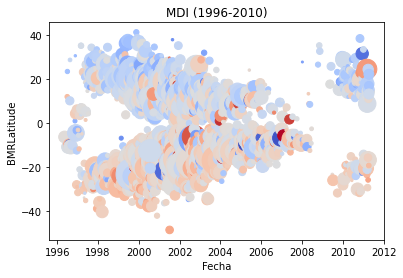

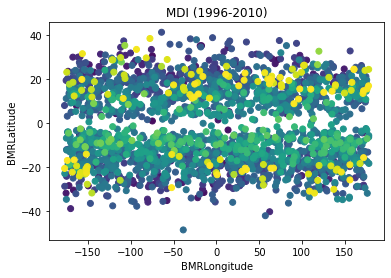

In [321]:
flux = tabla_3['BMRFlux']

# Normalizar flujo

def minmax_norm(df_input):
    return (flux - flux.min()) / (flux.max() - flux.min())

flux_norm = 1000 * minmax_norm(flux)

# plot

plt.scatter(tiempo_3, tabla_3['BMRLatitude'], s=flux_norm, c=tabla_3['Tilt_rel'], cmap='coolwarm')
plt.title('MDI (1996-2010)')
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')
plt.show()

plt.scatter(tabla_3['BMRLongitude'], tabla_3['BMRLatitude'], c=tiempo_3, cmap='viridis')
plt.title('MDI (1996-2010)')
plt.xlabel('BMRLongitude')
plt.ylabel('BMRLatitude')
plt.show()

C:\Users\diego\AppData\Local\Temp/ipykernel_18948/878474419.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = indices_3.loc[inicio : fin]


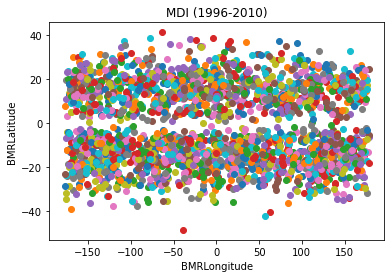

In [322]:
for i in range(1996,2011):
    mascara = tabla_1['Year'] == i
    for j in range(6):
        year = i
        m1 = 2*j + 1
        m2 = 2*j + 2
        inicio = str(year)+'-'+str(m1)
        fin = str(year)+'-'+str(m2)
        data = indices_3.loc[inicio : fin]

        plt.plot()
        plt.scatter(data['BMRLongitude'], data['BMRLatitude'])

plt.title('MDI (1996-2010)')
plt.xlabel('BMRLongitude')
plt.ylabel('BMRLatitude')
plt.show()

In [323]:
tiempo_4 = pd.to_datetime(tabla_4.iloc[:,[1,2,3,4,5,6]])
tabla_4['Date'] = tiempo_4
indices_4 = tabla_4.set_index(['Date'])

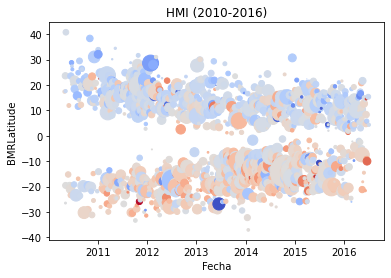

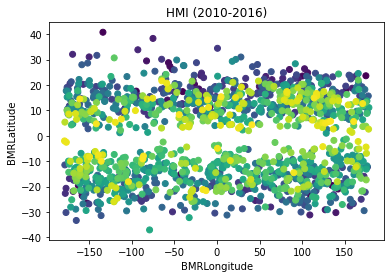

In [324]:
flux = tabla_4['BMRFlux']

# Normalizar flujo

def minmax_norm(df_input):
    return (flux - flux.min()) / (flux.max() - flux.min())

flux_norm = 1000 * minmax_norm(flux)

# plot

plt.scatter(tiempo_4, tabla_4['BMRLatitude'], s=flux_norm, c=tabla_4['Tilt_rel'], cmap='coolwarm')
plt.title('HMI (2010-2016)')
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')
plt.show()

plt.scatter(tabla_4['BMRLongitude'], tabla_4['BMRLatitude'], c=tiempo_4, cmap='viridis')
plt.title('HMI (2010-2016)')
plt.xlabel('BMRLongitude')
plt.ylabel('BMRLatitude')
plt.show()

C:\Users\diego\AppData\Local\Temp/ipykernel_18948/2613215966.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = indices_4.loc[inicio : fin]


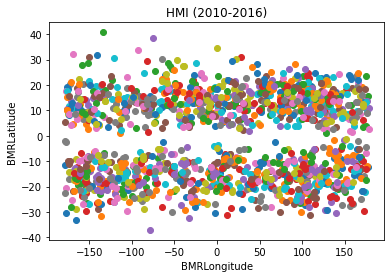

In [325]:
for i in range(2010,2017):
    mascara = tabla_1['Year'] == i
    for j in range(6):
        year = i
        m1 = 2*j + 1
        m2 = 2*j + 2
        inicio = str(year)+'-'+str(m1)
        fin = str(year)+'-'+str(m2)
        data = indices_4.loc[inicio : fin]

        plt.plot()
        plt.scatter(data['BMRLongitude'], data['BMRLatitude'])

plt.title('HMI (2010-2016)')
plt.xlabel('BMRLongitude')
plt.ylabel('BMRLatitude')
plt.show()

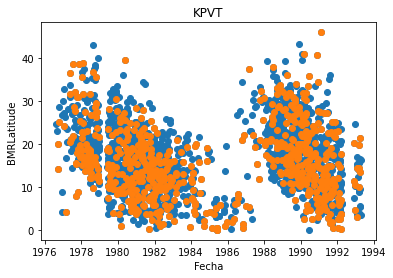

In [327]:
mascara = tabla_1['BMRLatitude'] > 0

plt.scatter(tiempo_1[mascara], tabla_1.loc[mascara, 'BMRLatitude'])
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')

mascara = np.logical_and(mascara, tabla_1['Tilt_rel'] > 0)

plt.scatter(tiempo_1[mascara], tabla_1.loc[mascara, 'BMRLatitude'])
plt.title('KPVT')
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')
plt.show()